In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("halong_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,6,6,45,3,500,NaN
1,3/2/2019,59,55,1,6,500,NaN
2,3/3/2019,43,28,5,9,500,NaN
3,3/4/2019,27,3,4,16,500,NaN
4,3/5/2019,48,17,16,1,500,NaN
...,...,...,...,...,...,...,...
1915,5/28/2024,64,32,48,9,500,NaN
1916,5/29/2024,47,20,23,8,500,NaN
1917,5/30/2024,40,6,49,9,500,NaN
1918,5/31/2024,12,18,14,8,500,NaN


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1920 non-null   object 
 1   pm25    1920 non-null   int64  
 2   pm10    1920 non-null   int64  
 3   o3      1920 non-null   int64  
 4   no2     1920 non-null   int64  
 5   so2     1920 non-null   int64  
 6   co      0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.0,0.0
mean,40.085938,23.563021,18.845833,9.697396,500.0,NaN
std,22.956887,13.469754,20.556540,7.802379,0.0,NaN
min,5.000000,3.000000,1.000000,1.000000,500.0,NaN
25%,22.000000,13.000000,8.000000,1.000000,500.0,NaN
50%,38.000000,22.000000,13.000000,9.000000,500.0,NaN
75%,54.000000,32.000000,22.000000,15.000000,500.0,NaN
max,163.000000,86.000000,268.000000,36.000000,500.0,NaN


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,6,6
1,59,55
2,43,28
3,27,3
4,48,17
...,...,...
1915,64,32
1916,47,20
1917,40,6
1918,12,18


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)

<Axes: >

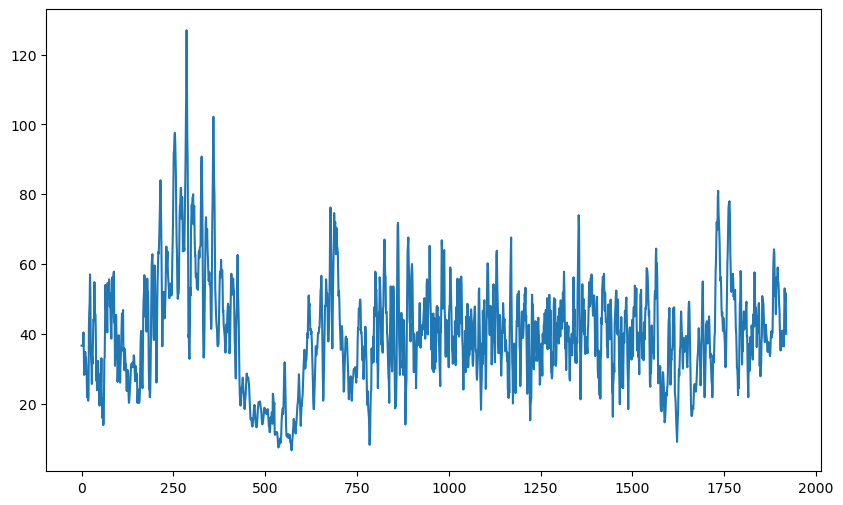

In [6]:
data['pm25'].plot(figsize=(10,6))

In [7]:
# Split the data into training, testing
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1728
Test data size: 192


In [8]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit(maxlags =15 , ic='aic')

In [9]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'pm10'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))


In [10]:
y_pred

array([[59.43017269, 30.37752514],
       [56.92164841, 30.05088522],
       [54.06785771, 27.92289999],
       [48.42160929, 25.62534967],
       [41.86818819, 24.36122743],
       [38.82716651, 23.63986007],
       [38.21678026, 22.96016698],
       [38.60328561, 22.99361065],
       [38.83492927, 23.37127096],
       [39.57840311, 23.8608055 ],
       [40.83344159, 24.44234791],
       [41.39119115, 24.93608158],
       [41.54298759, 25.58034088],
       [42.98362189, 26.04987   ],
       [44.34315517, 26.29572676],
       [44.3250212 , 26.46632687],
       [44.36121232, 26.6896233 ],
       [44.41380194, 26.41754623],
       [43.54905569, 26.05584534],
       [42.51630491, 25.73081894],
       [42.12535292, 25.31044647],
       [41.78926429, 24.79773475],
       [41.47191564, 24.62207958],
       [41.33495408, 24.59043214],
       [41.39666025, 24.56350842],
       [41.51478369, 24.63379282],
       [41.54053808, 24.79524721],
       [41.61099536, 24.88983161],
       [41.90444838,

In [11]:
y_pred = pd.DataFrame(y_pred, columns=['pm25', 'pm10'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [12]:
y_pred

array([[52.14189526, 27.66757749],
       [52.14189526, 27.66757749],
       [52.14189526, 27.66757749],
       [52.14189526, 27.66757749],
       [52.14189526, 27.66757749],
       [48.02129402, 26.32004448],
       [44.28032039, 24.90190083],
       [41.18740597, 23.91604296],
       [39.27006997, 23.46522722],
       [38.81211295, 23.36514283],
       [39.21336797, 23.5256404 ],
       [39.84825015, 23.92082332],
       [40.43619054, 24.43816936],
       [41.26592907, 24.97388917],
       [42.21887948, 25.46087342],
       [42.9171954 , 25.86566921],
       [43.51119963, 26.21637756],
       [44.0853625 , 26.38381863],
       [44.19844926, 26.3850137 ],
       [43.83307921, 26.27203214],
       [43.39314555, 26.04085606],
       [42.87875595, 25.66247835],
       [42.29037869, 25.30338502],
       [41.84755836, 25.01030238],
       [41.62362943, 24.77684027],
       [41.50151559, 24.64150954],
       [41.45177035, 24.64101203],
       [41.47958629, 24.69456244],
       [41.59348515,

In [13]:

# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index = data.index[-1]

# # Dự đoán cho 90 ngày tiếp theo
y_next_90_days = model_fitted.forecast(data.values[-model_fitted.k_ar:], steps=90)



# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)



Predicted closing prices for the next 90 days:
[[36.55676255 19.36328093]
 [36.03769995 19.22146219]
 [32.91338198 21.67430023]
 [34.42188871 21.08961991]
 [37.32068516 22.5215568 ]
 [37.39084586 22.71673404]
 [39.1944333  23.5159979 ]
 [40.19969143 24.3471923 ]
 [39.04890899 24.05037062]
 [41.38321688 24.64498116]
 [42.1546476  25.0244506 ]
 [41.04179894 25.12475646]
 [41.89421944 23.89942993]
 [42.30396027 24.64755572]
 [39.64321113 24.06093928]
 [39.45028547 23.75039289]
 [39.62760155 23.23211078]
 [38.43315493 23.69076459]
 [38.60837734 23.1250379 ]
 [39.48719812 23.27633281]
 [39.21689809 23.26946008]
 [39.4715783  23.51085723]
 [40.01977663 23.60987197]
 [39.66389132 23.73300296]
 [40.08623935 23.73275201]
 [40.30251407 23.86035769]
 [40.06883201 23.93571753]
 [40.20032615 23.69578711]
 [40.4506667  23.81065504]
 [39.86795382 23.8043941 ]
 [39.92268457 23.70249102]
 [40.02328874 23.53264958]
 [39.69105649 23.66147146]
 [39.64847982 23.52168771]
 [39.8688814  23.50869163]
 [39.695

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 12.443455890360497

Testing MAE: 9.149643089290175

Testing MAPE: 18.775605038666647


In [15]:
test_data.index

RangeIndex(start=1728, stop=1920, step=1)

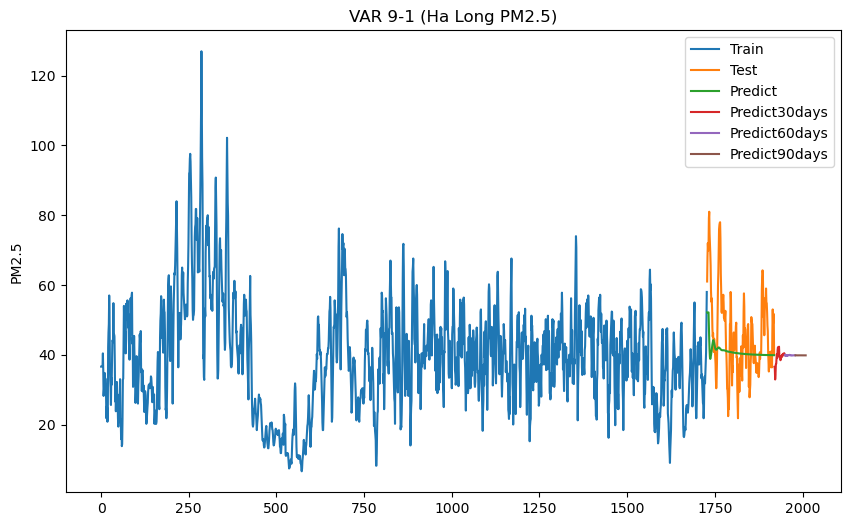

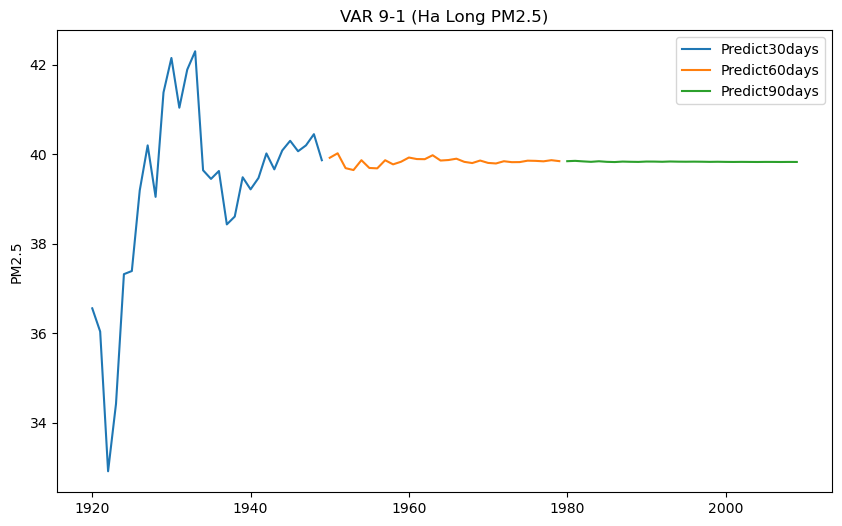

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử last_index và y_next_90_days đã được định nghĩa trước đó
# Bạn có thể thay thế chúng bằng dữ liệu thực tế của mình

# Vẽ biểu đồ huấn luyện và kiểm tra với dự đoán
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['pm25'], label='Train')
plt.plot(test_data.index, test_data['pm25'], label='Test')
plt.plot(test_data.index, y_pred[:, 0], label='Predict')

# Vẽ dự đoán 90 ngày
last_index = data.index[-1]  # Giả sử last_index là index cuối cùng của train_data

last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 9-1 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()

# Vẽ dự đoán 90 ngày với kích thước 14x7
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 9-1 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()
